<b> Shoebox Model </b><br>
Reference: Walter A. Robinson, Modeling Dynamic Climate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

In [2]:
# Step size          
dt = 10

# Set up simulation time
tmin = 0
tmax = 10800
t = np.arange(tmin, tmax + dt, dt)
n = len(t)

In [3]:
# Incoming radiation (lightbulb)
sun = 60 # W

# Shoebox height, width, length, area
height = 0.15 # m
width = 0.20 # m
length = 0.40 # m
area = length * width # m^2

# Cloud area
cloud_area = 0.05 # m^2

# Cloud thickness
cloud_thickness = 0.001 # m

# Cloud temperature
cloud_temperature = 273.15 # K

# Specific heat capacity of atmosphere
spec_heat_atm = 1004 # J/kg*K

# Specific heat capacity of water
spec_heat_water = 4218 # J/kg*K

# Air density
air_density = 1.25 # kg/m^3

# Density of water
water_density = 1000 # kg/m^3

# Ocean
ocean_depth = 0.02 # m
ocean_fraction = 0.5

ocean_area = area * ocean_fraction # m^2
ocean_heat_capacity = water_density * spec_heat_water * ocean_area * ocean_depth # J/K

# Air mass and cloud capacity
air_volume = area * height # m^3
air_mass = air_density * air_volume # kg
cloud_capacity = cloud_area * cloud_thickness # m^3

# Latent heat of vaporization
lv = 2500000 # J/kg

#  Water-vapor gas constant is Rv = 461 J/K*kg
rv = 461 # J/K*Kg

# Diffusion velocity
diffusion_velocity = 1.5 * 10 ** -2 # m/s

# Cloud saturation humidity (Clausius-Clapeyron Equation)
cloud_saturation_humidity = 0.0038 * np.exp((lv/rv) * (1/273.15 - 1/cloud_temperature))

# Cloud flux constant
cloud_flux_constant = air_density * diffusion_velocity * cloud_area # kg/s

# Ocean flux constant
ocean_flux_constant = ocean_area * air_density * diffusion_velocity # kg/s

In [4]:
# Air
air = np.zeros((n, ))

# Cloud
cloud = np.zeros((n, ))

# Surface temperature
temperature = np.zeros((n, ))
temperature[0] = 280

# Humidity
humidity = np.zeros((n, ))
humidity[0] = air[0]/air_mass

# Saturation humidity
saturation_humidity = np.zeros((n, ))
saturation_humidity[0] = 0.0038 * np.exp((lv/rv) * (1/273.15 - 1/temperature[0]))

# Evaporation
evaporation = np.zeros((n, )) 
evaporation[0] =  ocean_flux_constant * (saturation_humidity[0] - humidity[0]) 

# Condensation - Sensible heat
condensation = np.zeros((n, )) 
condensation[0] = cloud_flux_constant * (humidity[0] - cloud_saturation_humidity)

# Conduction
conduction = np.zeros((n, ))
conduction[0] = air_density * spec_heat_atm * (temperature[0] - cloud_temperature) * cloud_area * diffusion_velocity

# Precipitation
precip = np.zeros((n, ))
precip[0] = conduction[0]

# Latent Heat of Evaporation
l_evaporation = np.zeros((n, ))
l_evaporation[0] = lv * evaporation[0]

In [5]:
for k in range(1, n):
    
    # Air
    air[k] = air[k-1] + (evaporation[k-1] - condensation[k-1]) * dt
    
    # Cloud
    cloud[k] = cloud[k-1] + (condensation[k-1] - precip[k-1]) * dt
    
    # Surface temperature
    temperature[k] = temperature[k-1] + (sun - l_evaporation[k-1] - conduction[k-1]) * dt/ocean_heat_capacity
    
    # Humidity
    humidity[k] = air[k]/air_mass
    
    # Saturation humidity
    saturation_humidity[k] = 0.0038 * np.exp((lv/rv) * (1/273.15 - 1/temperature[k]))

    # Evaporation
    evaporation[k] = ocean_flux_constant * (saturation_humidity[k] - humidity[k]) 
    
    # Condensation
    condensation[k] =  cloud_flux_constant * (humidity[k] - cloud_saturation_humidity)
    
    # Conduction - Sensible heat
    conduction[k] = air_density * spec_heat_atm * (temperature[k] - cloud_temperature) * cloud_area * diffusion_velocity
    
    # Latent Heat of Evaporation
    l_evaporation[k] = lv * evaporation[k]
    
    # Precipitation
    if cloud[k] > cloud_capacity:
        precip[k] = condensation[k]
    else:
        precip[k] = 0

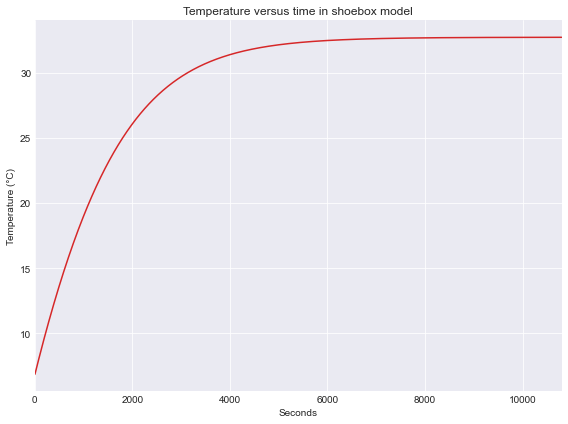

In [6]:
# Plot the result of the shoebox model
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Seconds")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature versus time in shoebox model")
ax.set_xlim(0, t.max())
ax.plot(t, temperature - 273.15, c="tab:red")
ax.grid()
plt.tight_layout()
plt.show()

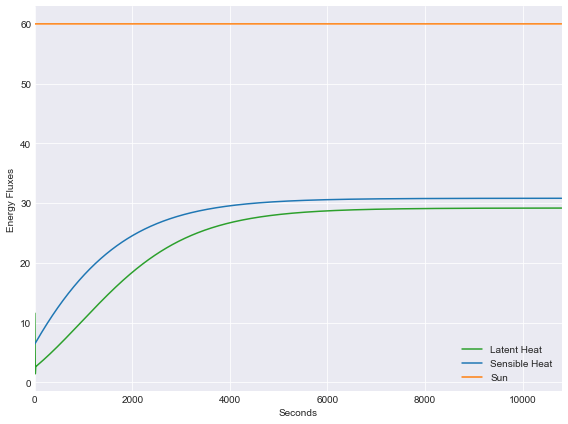

In [7]:
# Plot Energy fluxes
sun_np = sun * np.ones(n)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Seconds")
ax.set_ylabel("Energy Fluxes")
ax.set_xlim(0, t.max())
ax.plot(t, l_evaporation, c="tab:green")
ax.plot(t, conduction, c="tab:blue")
ax.plot(t, sun_np, c="tab:orange")
ax.legend(("Latent Heat","Sensible Heat", "Sun"))
ax.grid()
plt.tight_layout()
plt.show()

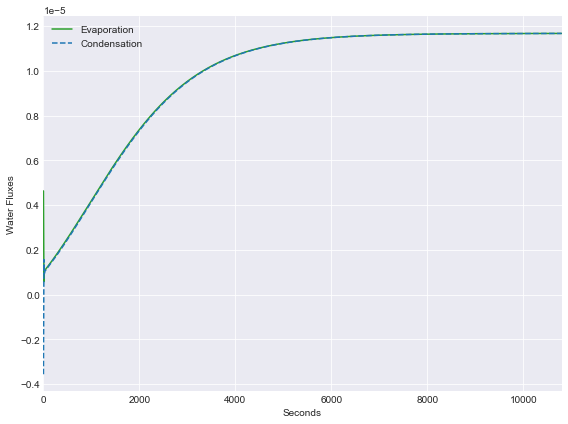

In [8]:
# Water fluxes
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Seconds")
ax.set_ylabel("Water Fluxes")
ax.set_xlim(0, t.max())
ax.plot(t, evaporation, c="tab:green")
ax.plot(t, condensation, c="tab:blue", linestyle="dashed")
ax.legend(("Evaporation","Condensation"))
ax.grid()
plt.tight_layout()
plt.show()

In [9]:
print(f"Final Temperature, T={round(temperature[-1] - 273.15)}°C")

Final Temperature, T=33°C
